In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection 
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.model_selection import train_test_split

In [80]:
import warnings
warnings.filterwarnings('ignore')

In [81]:
df = fetch_openml('credit-g', as_frame=True)

In [82]:
type(df)

sklearn.utils.Bunch

In [83]:
X = df.data
y = df.target

In [84]:
%matplotlib inline

### Question 1.1 
Determine which features are continuous and which are categorical.

In [85]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
checking_status           1000 non-null category
duration                  1000 non-null float64
credit_history            1000 non-null category
purpose                   1000 non-null category
credit_amount             1000 non-null float64
savings_status            1000 non-null category
employment                1000 non-null category
installment_commitment    1000 non-null float64
personal_status           1000 non-null category
other_parties             1000 non-null category
residence_since           1000 non-null float64
property_magnitude        1000 non-null category
age                       1000 non-null float64
other_payment_plans       1000 non-null category
housing                   1000 non-null category
existing_credits          1000 non-null float64
job                       1000 non-null category
num_dependents            1000 non-null float64
own_telephone      

In [86]:
cols = X.columns
numeric_cols = X._get_numeric_data().columns

In [87]:
# If numeric feature has level less than 3, view it as a categorical features
cont_col = []
cat_col = list(set(cols) - set(numeric_cols))
for col in numeric_cols:
    if max(list(X[col]))-min(list(X[col]))<3:
        cat_col.append(col)
        X[col] = X[col].astype('category')

    else:
        cont_col.append(col)

In [88]:
cont_col

['duration',
 'credit_amount',
 'installment_commitment',
 'residence_since',
 'age',
 'existing_credits']

In [89]:
cat_col

['credit_history',
 'job',
 'savings_status',
 'own_telephone',
 'other_payment_plans',
 'checking_status',
 'personal_status',
 'employment',
 'property_magnitude',
 'foreign_worker',
 'purpose',
 'housing',
 'other_parties',
 'num_dependents']

### Question 1.2
Visualize the univariate distribution of each continuous feature, and the distribution of the
target.

Text(0.5, 1.0, 'target distribution')

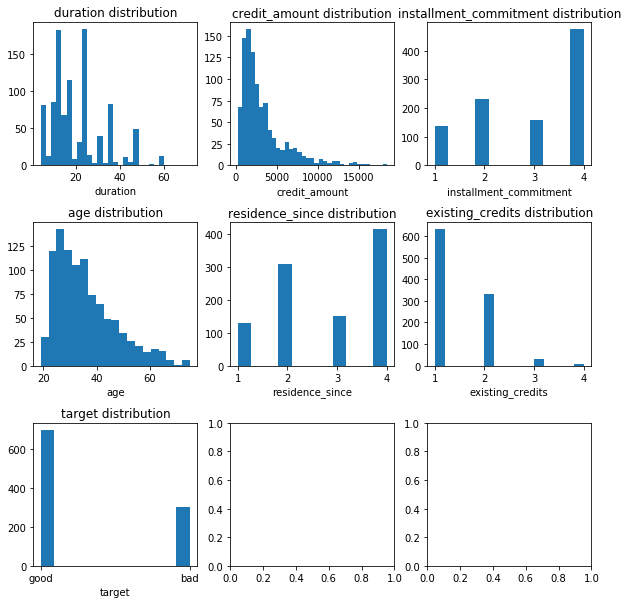

In [90]:
fig,ax = plt.subplots(3,3,figsize = (10,10))

plt.subplots_adjust(hspace = 0.4)
ax[0,0].hist(X['duration'], bins = "auto")
ax[0,0].set_xlabel("duration")
ax[0,0].set_title("duration distribution")

ax[0,1].hist(X["credit_amount"], bins = "auto")
ax[0,1].set_xlabel("credit_amount")
ax[0,1].set_title("credit_amount distribution")

ax[0,2].hist(X["installment_commitment"],bins = "auto")
ax[0,2].set_xlabel('installment_commitment')
ax[0,2].set_title("installment_commitment distribution")

ax[1,0].hist(X["age"],bins = "auto")
ax[1,0].set_xlabel("age")
ax[1,0].set_title("age distribution")

ax[1,1].hist(X['residence_since'],bins = "auto")
ax[1,1].set_xlabel('residence_since')
ax[1,1].set_title("residence_since distribution")

ax[1,2].hist(X['existing_credits'],bins = "auto")
ax[1,2].set_xlabel('existing_credits')
ax[1,2].set_title("existing_credits distribution")


ax[2,0].hist(y,bins = "auto")
ax[2,0].set_xlabel("target")
ax[2,0].set_title("target distribution")


### Question1.3
Split data into training and test set. Do not use the test set until a final evaluation in 1.5.
Preprocess the data (such as treatment of categorical variables) without using a pipeline and
evaluate an initial LogisticRegression model with an training/validation split.

In [144]:
##split train and test
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y,random_state = 0)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval,random_state = 0)

##make continuous variable of train and validation set scaled 
continuous1 = X_train[cont_col]
continuous2 = X_val[cont_col]
scaler = StandardScaler()
scaler.fit(continuous)
X_train_cont_scaled = scaler.transform(continuous1)
X_val_cont_scaled = scaler.transform(continuous2)

X_train[cont_col] = X_train_cont_scaled
X_val[cont_col] = X_val_cont_scaled

##make dummy
X_train_dummy = pd.get_dummies(X_train)
X_val_dummy = pd.get_dummies(X_val)




In [145]:
LRmodel = LogisticRegression()
LRmodel.fit(X_train_dummy,y_train)
LRmodel.score(X_val_dummy,y_val)

0.7872340425531915

### question 1.4
1.4 Use ColumnTransformer and pipeline to encode categorical variables (your choice of
OneHotEncoder or another one from the categorical_encoder package, or both). Evaluate
Logistic Regression, linear support vector machines and nearest neighbors using
cross-validation. How different are the results? How does scaling the continuous features with
StandardScaler influence the results?

In [93]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

In [146]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y,random_state = 0)


In [147]:
categorical = X.dtypes == "category"

preprocess1 = make_column_transformer(
    (StandardScaler(), ~categorical),
    (OneHotEncoder(), categorical))

preprocess2 = make_column_transformer(
    (OneHotEncoder(), categorical))



In [148]:
models = {'Logistic': LogisticRegression(), 'SVC': LinearSVC(max_iter=5000), 'KNN': KNeighborsClassifier()}

print("Scaled score")
for model_name, model in models.items():
    model_pipe = make_pipeline(preprocess1,model)
    score = cross_val_score(model_pipe, X_train_2, y_train_2, cv=10)
    print("The cv score for ",model_name,"is", np.mean(score))
print("Unscaled score")
for model_name, model in models.items():
    model_pipe = make_pipeline(preprocess2,model)
    score = cross_val_score(model_pipe, X_train_2, y_train_2, cv=10)
    print("The cv score for ",model_name,"is", np.mean(score))          

Scaled score
The cv score for  Logistic is 0.7626666666666668
The cv score for  SVC is 0.7533333333333334
The cv score for  KNN is 0.7346666666666667
Unscaled score
The cv score for  Logistic is 0.7533333333333333
The cv score for  SVC is 0.748
The cv score for  KNN is 0.6906666666666668


From the result we can clearly see unscaled data has quite lower score than scaled data. 

### question 1.5 
Tune the parameters using GridSearchCV. Do the results improve? Evaluate only the be
model on the test set.
Visualize the performance as function of the parameters for all three models.

In [97]:
from sklearn.model_selection import GridSearchCV

In [98]:
###logistic
param_grid_logistic = {'logisticregression__C':np.array([0.001,0.01,0.1,1,10,100])}

pipe = make_pipeline(preprocess1,LogisticRegression())
grid1 = GridSearchCV(pipe, param_grid=param_grid_logistic,
                    cv=10, return_train_score=True)
grid1.fit(X_train_2,y_train_2)

print("best mean cross-validation score: {:.3f}".format(grid1.best_score_))
print("best parameters: {}".format(grid1.best_params_))
print("test-set score: {:.3f}".format(grid1.score(X_test_2, y_test_2)))
print("###########################")

###SVM
param_grid_SVC = {'linearsvc__C':np.array([0.001,0.01,0.1,1,10,100])}

pipe = make_pipeline(preprocess1,LinearSVC())
grid2 = GridSearchCV(pipe, param_grid=param_grid_SVC,
                    cv=10, return_train_score=True)
grid2.fit(X_train_2,y_train_2)

print("best cv score for SVM: {:.3f}".format(grid2.best_score_))
print("best parameters: {}".format(grid2.best_params_))
print("test-set score: {:.3f}".format(grid2.score(X_test_2, y_test_2)))
print("###########################")

###knn
param_grid_knn = {'kneighborsclassifier__n_neighbors':np.arange(1,15,2)}

pipe = make_pipeline(preprocess1,KNeighborsClassifier())
grid3 = GridSearchCV(pipe, param_grid=param_grid_knn,
                    cv=10, return_train_score=True)
grid3.fit(X_train_2,y_train_2)

print("best cv score for knn: {:.3f}".format(grid3.best_score_))
print("best parameters: {}".format(grid3.best_params_))
print("test-set score: {:.3f}".format(grid3.score(X_test_2, y_test_2)))


best mean cross-validation score: 0.768
best parameters: {'logisticregression__C': 0.1}
test-set score: 0.752
###########################
best cv score for SVM: 0.763
best parameters: {'linearsvc__C': 0.01}
test-set score: 0.756
###########################
best cv score for knn: 0.749
best parameters: {'kneighborsclassifier__n_neighbors': 13}
test-set score: 0.728


In [99]:
pipe = make_pipeline(preprocess1,LinearSVC(C = 0.01))
pipe.fit(X_train_2, y_train_2)
print("test-set score: {:.3f}".format(pipe.score(X_test_2, y_test_2)))

test-set score: 0.756


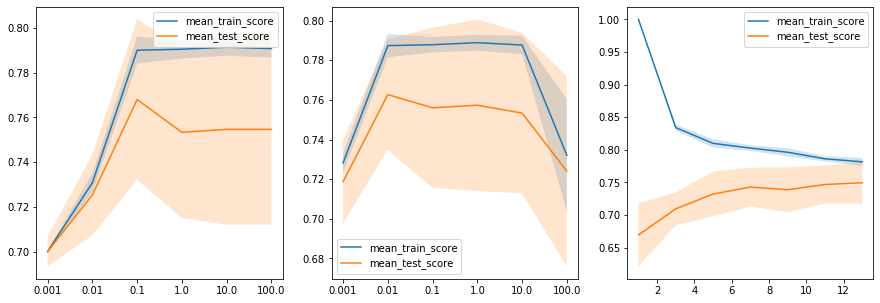

In [100]:
fig,ax = plt.subplots(1,3,figsize = (15,5))

results = pd.DataFrame(grid1.cv_results_)
x1 = results['param_logisticregression__C']
# create an index for each tick position
xi = list(range(len(x1)))
ax[0].plot(xi, results['mean_train_score'],label = 'mean_train_score')
ax[0].plot(xi,results['mean_test_score'],label = 'mean_test_score')
#ax[0].set_xticks(list(x))

ax[0].fill_between(xi,
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2)
ax[0].fill_between(xi,
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2)
ax[0].legend()

plt.sca(ax[0])
plt.xticks(xi,x1)

###############################################
results = pd.DataFrame(grid2.cv_results_)
x2 = results['param_linearsvc__C']
# create an index for each tick position
xi = list(range(len(x2)))
ax[1].plot(xi, results['mean_train_score'],label = 'mean_train_score')
ax[1].plot(xi,results['mean_test_score'],label = 'mean_test_score')

ax[1].fill_between(xi,
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2)
ax[1].fill_between(xi,
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2)
ax[1].legend()

plt.sca(ax[1])
plt.xticks(xi,x2)
##############################################

results = pd.DataFrame(grid3.cv_results_)
ax[2].plot(results['param_kneighborsclassifier__n_neighbors'], results['mean_train_score'],label = 'mean_train_score')
ax[2].plot(results['param_kneighborsclassifier__n_neighbors'],results['mean_test_score'],label = 'mean_test_score')

ax[2].fill_between(results['param_kneighborsclassifier__n_neighbors'].astype(np.int),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2)
ax[2].fill_between(results['param_kneighborsclassifier__n_neighbors'].astype(np.int),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2)
ax[2].legend()




### question 1.6 
Change the cross-validation strategy from ‘stratified k-fold’ to ‘kfold’ with shuffling. Do the
parameters that are found change? Do they change if you change the random seed of the
shuffling? Or if you change the random state of the split into training and test data?

In [101]:
model_selection_parameter = {'Logistic Regression': [LogisticRegression(),{'logisticregression__C':np.array([0.001,0.01,0.1,1,10,100])}], 
              'SVM': [LinearSVC(),{'linearsvc__C':np.array([0.001,0.01,0.1,1,10,100])}], 
              'KNN': [KNeighborsClassifier(),{'kneighborsclassifier__n_neighbors':np.arange(1, 15, 2)}]}



for index, (model, parameter) in enumerate(model_selection_parameter.items()):
   
        
    skf = StratifiedKFold(n_splits=10, shuffle=True)

    pipe = make_pipeline(preprocess1,parameter[0])
    grid_kfold = GridSearchCV(pipe, param_grid = parameter[1], cv=skf)
    grid_kfold.fit(X_train_2, y_train_2)

    print("The best parameter of {} with StratifiedKFold is {}".format(model,
        grid_kfold.cv_results_['params'][grid_kfold.best_index_]))
print("##################################################")
for index, (model, parameter) in enumerate(model_selection_parameter.items()):
   
        
    kf = KFold(n_splits=10, shuffle=True)
    pipe = make_pipeline(preprocess1,parameter[0])
    grid_kfold = GridSearchCV(pipe, param_grid = parameter[1], cv=kf)
    grid_kfold.fit(X_train_2, y_train_2)

    print("The best parameter of {} with ‘kfold’ with shufflingis {}".format(model,
        grid_kfold.cv_results_['params'][grid_kfold.best_index_]))


The best parameter of Logistic Regression with StratifiedKFold is {'logisticregression__C': 0.1}
The best parameter of SVM with StratifiedKFold is {'linearsvc__C': 0.01}
The best parameter of KNN with StratifiedKFold is {'kneighborsclassifier__n_neighbors': 11}
##################################################
The best parameter of Logistic Regression with ‘kfold’ with shufflingis {'logisticregression__C': 0.1}
The best parameter of SVM with ‘kfold’ with shufflingis {'linearsvc__C': 10.0}
The best parameter of KNN with ‘kfold’ with shufflingis {'kneighborsclassifier__n_neighbors': 11}


From the result we can see change  cross-validation strategy from ‘stratified k-fold’ to ‘kfold’ with shuffling won't change the parameters found for logistic regression and linear SVC. The parametyer for knn is changed.

In [102]:
random_state_list = [1,5,10,50,100]
for index, (model, parameter) in enumerate(model_selection_parameter.items()):
    for rd in random_state_list:
        
        skf =  StratifiedKFold(n_splits=10, shuffle=True,random_state = rd)
        
        pipe = make_pipeline(preprocess1,parameter[0])
        grid_kfold = GridSearchCV(pipe, param_grid = parameter[1], cv=skf)
        grid_kfold.fit(X_train_2, y_train_2)
        
        print("The best parameter of {} with random state {} is {}".format(model, rd,
            grid_kfold.cv_results_['params'][grid_kfold.best_index_]))
        
        
        

The best parameter of Logistic Regression with random state 1 is {'logisticregression__C': 0.1}
The best parameter of Logistic Regression with random state 5 is {'logisticregression__C': 0.1}
The best parameter of Logistic Regression with random state 10 is {'logisticregression__C': 0.1}
The best parameter of Logistic Regression with random state 50 is {'logisticregression__C': 0.1}
The best parameter of Logistic Regression with random state 100 is {'logisticregression__C': 0.1}
The best parameter of SVM with random state 1 is {'linearsvc__C': 10.0}
The best parameter of SVM with random state 5 is {'linearsvc__C': 10.0}
The best parameter of SVM with random state 10 is {'linearsvc__C': 1.0}
The best parameter of SVM with random state 50 is {'linearsvc__C': 0.1}
The best parameter of SVM with random state 100 is {'linearsvc__C': 0.1}
The best parameter of KNN with random state 1 is {'kneighborsclassifier__n_neighbors': 11}
The best parameter of KNN with random state 5 is {'kneighborscla

From above we see change the random seed of the shuffing won't change the parameters found for logistic regression and linear SVC. The parametyer for knn is changed.

In [103]:
random_state_list = [1,5,10,50,100]
for index, (model, parameter) in enumerate(model_selection_parameter.items()):
    for rd in random_state_list:
        
        X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, y, random_state = rd)
        skf =  StratifiedKFold(n_splits=10, shuffle=True)
        
        pipe = make_pipeline(preprocess1,parameter[0])
        grid_kfold = GridSearchCV(pipe, param_grid = parameter[1], cv=skf)
        grid_kfold.fit(X_train_3, y_train_3)
        
        print("The best parameter of {} with random state of split {} is {}".format(model, rd,
            grid_kfold.cv_results_['params'][grid_kfold.best_index_]))
        
        
        

The best parameter of Logistic Regression with random state of split 1 is {'logisticregression__C': 0.1}
The best parameter of Logistic Regression with random state of split 5 is {'logisticregression__C': 1.0}
The best parameter of Logistic Regression with random state of split 10 is {'logisticregression__C': 0.1}
The best parameter of Logistic Regression with random state of split 50 is {'logisticregression__C': 1.0}
The best parameter of Logistic Regression with random state of split 100 is {'logisticregression__C': 1.0}
The best parameter of SVM with random state of split 1 is {'linearsvc__C': 0.01}
The best parameter of SVM with random state of split 5 is {'linearsvc__C': 0.1}
The best parameter of SVM with random state of split 10 is {'linearsvc__C': 0.01}
The best parameter of SVM with random state of split 50 is {'linearsvc__C': 1.0}
The best parameter of SVM with random state of split 100 is {'linearsvc__C': 0.01}
The best parameter of KNN with random state of split 1 is {'knei

As we can see  change the random state of the split into training and test data change the best parameter choice a lot. Best parameter changed for all three models for different random state of split.

### Question 1.7 
Visualize the 20 most important coefficients for LogisticRegression and Linear Support
Vector Machines using hyper-parameters that performed well in the grid-search.

In [137]:
coef = np.abs(grid1.best_estimator_[1].coef_)
top_coef_idx=list(np.flip(np.argsort(coef))[0][:20])

top_coef_name = [list(X_train_dummy.columns)[i] for i in top_coef_idx]
top_coef = grid1.best_estimator_[1].coef_[0][top_coef_idx]

In [143]:
grid1.best_estimator_[1]

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Text(0.5, 1.0, 'Top 20 coefficients for Logistic Regression')

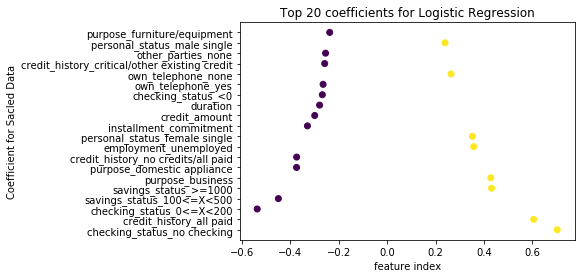

In [138]:
plt.scatter(top_coef,top_coef_name,
            c = np.sign(top_coef))

plt.xlabel('feature index')
plt.ylabel('Coefficient for Sacled Data')
plt.title('Top 20 coefficients for Logistic Regression')

Text(0.5, 1.0, 'Top 20 coefficients for linearsvc__C')

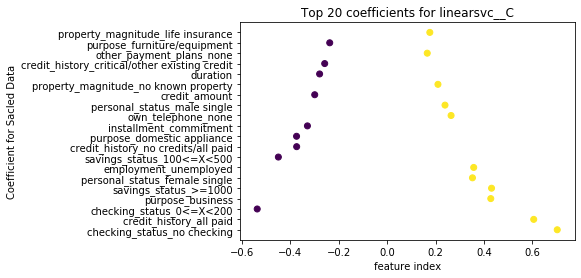

In [140]:
coef = np.abs(grid2.best_estimator_[1].coef_)
top_coef_idx=list(np.flip(np.argsort(coef))[0][:20])

top_coef_name = [list(X_train_dummy.columns)[i] for i in top_coef_idx]
top_coef = grid1.best_estimator_[1].coef_[0][top_coef_idx]

plt.scatter(top_coef,top_coef_name,
            c = np.sign(top_coef))

plt.xlabel('feature index')
plt.ylabel('Coefficient for Sacled Data')
plt.title('Top 20 coefficients for linearsvc__C')